In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:

import os
import glob
import numpy as np
import keras
#from keras import *
import tensorflow as tf
from tensorflow.keras import *

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [0]:

def load_data(vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join("/content/drive/My Drive/BE_project_dataset_and_code/Data/", '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []
    iter = 0

    #load a subset of the data to memory 
    for idx, file in enumerate(sorted(all_files)):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        data=255-data;
        labels = np.full(data.shape[0], idx)
        print(labels.shape,data.shape,"cur label num!",iter+1,file)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

    
        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)
        iter += 1


    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
#     print(x_train)
    return x_train, y_train, x_test, y_test, class_names

In [0]:
Xtrain, Ytrain, Xtest, Ytest, class_names = load_data()
num_classes = len(class_names)
image_size = 28

(5000,) (5000, 784) cur label num! 1 /content/drive/My Drive/BE_project_dataset_and_code/Data/ambulance.npy
(5000,) (5000, 784) cur label num! 2 /content/drive/My Drive/BE_project_dataset_and_code/Data/apple.npy
(5000,) (5000, 784) cur label num! 3 /content/drive/My Drive/BE_project_dataset_and_code/Data/axe.npy
(5000,) (5000, 784) cur label num! 4 /content/drive/My Drive/BE_project_dataset_and_code/Data/basketball.npy
(5000,) (5000, 784) cur label num! 5 /content/drive/My Drive/BE_project_dataset_and_code/Data/bicycle.npy
(5000,) (5000, 784) cur label num! 6 /content/drive/My Drive/BE_project_dataset_and_code/Data/boomerang.npy
(5000,) (5000, 784) cur label num! 7 /content/drive/My Drive/BE_project_dataset_and_code/Data/butterfly.npy
(5000,) (5000, 784) cur label num! 8 /content/drive/My Drive/BE_project_dataset_and_code/Data/car.npy
(5000,) (5000, 784) cur label num! 9 /content/drive/My Drive/BE_project_dataset_and_code/Data/carrot.npy
(5000,) (5000, 784) cur label num! 10 /content/d

apple


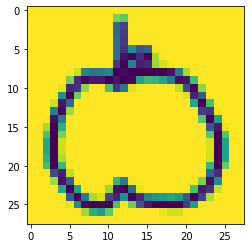

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(Xtrain))
plt.imshow(Xtrain[idx].reshape(28,28)) 
print(class_names[int(Ytrain[idx].item())])

In [0]:
# Reshape and normalize
x_train = Xtrain.reshape(Xtrain.shape[0], image_size, image_size).astype('float32')
x_test = Xtest.reshape(Xtest.shape[0], image_size, image_size).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(Ytrain, num_classes)
y_test = keras.utils.to_categorical(Ytest, num_classes)

In [0]:
model = Sequential()
model.add(LSTM(256, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(30,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                7710      
Total params: 299,550
Trainable params: 299,550
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

model.fit(x_train, y_train,
          batch_size=256,
          epochs=50,
          validation_data=(x_test, y_test))
acc = model.evaluate(x_test, y_test,batch_size=256)
print('Test accuracy:', acc[1])

Train on 120000 samples, validate on 30000 samples
Epoch 1/50
120000/120000 [==============================] - 214s 2ms/step - loss: 1.8992 - accuracy: 0.4377 - val_loss: 1.3205 - val_accuracy: 0.6099
Epoch 2/50
120000/120000 [==============================] - 214s 2ms/step - loss: 1.1974 - accuracy: 0.6467 - val_loss: 1.0783 - val_accuracy: 0.6840
Epoch 3/50
120000/120000 [==============================] - 214s 2ms/step - loss: 1.0227 - accuracy: 0.6989 - val_loss: 0.9824 - val_accuracy: 0.7069
Epoch 4/50
120000/120000 [==============================] - 216s 2ms/step - loss: 0.9010 - accuracy: 0.7335 - val_loss: 0.8862 - val_accuracy: 0.7401
Epoch 5/50
120000/120000 [==============================] - 216s 2ms/step - loss: 0.8187 - accuracy: 0.7581 - val_loss: 0.8469 - val_accuracy: 0.7512
Epoch 6/50
120000/120000 [==============================] - 208s 2ms/step - loss: 0.7489 - accuracy: 0.7780 - val_loss: 0.7666 - val_accuracy: 0.7766
Epoch 7/50
120000/120000 [=======================

['lightning', 'windmill', 'ambulance', 'star', 'tractor']


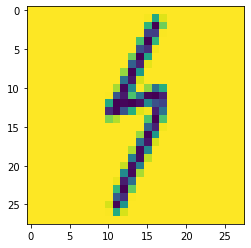

In [0]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [0]:
model.save('lstm.h5')